In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('Train_data.csv') 
df.head()

print('\nShape')
df.shape

print('\nInfo')
df.info()

print('\nResponse_value')
print(df.Response.value_counts()) 
df.Response.value_counts (normalize=True)

print('\nNullity_Check')
Null_Check=df.isnull().sum()
print(Null_Check)






Shape

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB

Response_value
0    334399
1     46710
Name: Response, dtype: int64

Nullity_Check
i

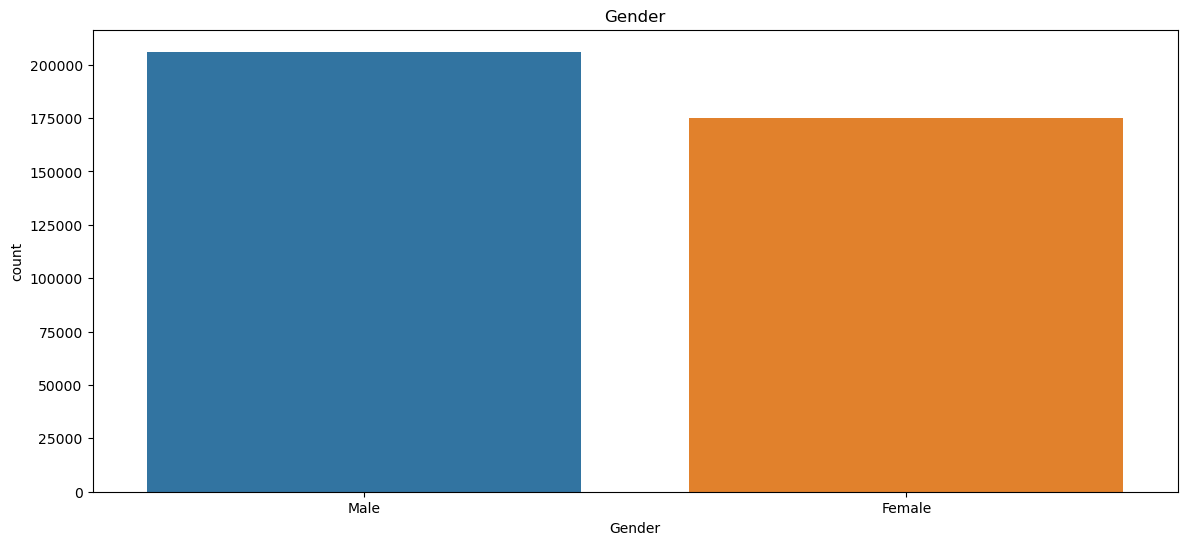

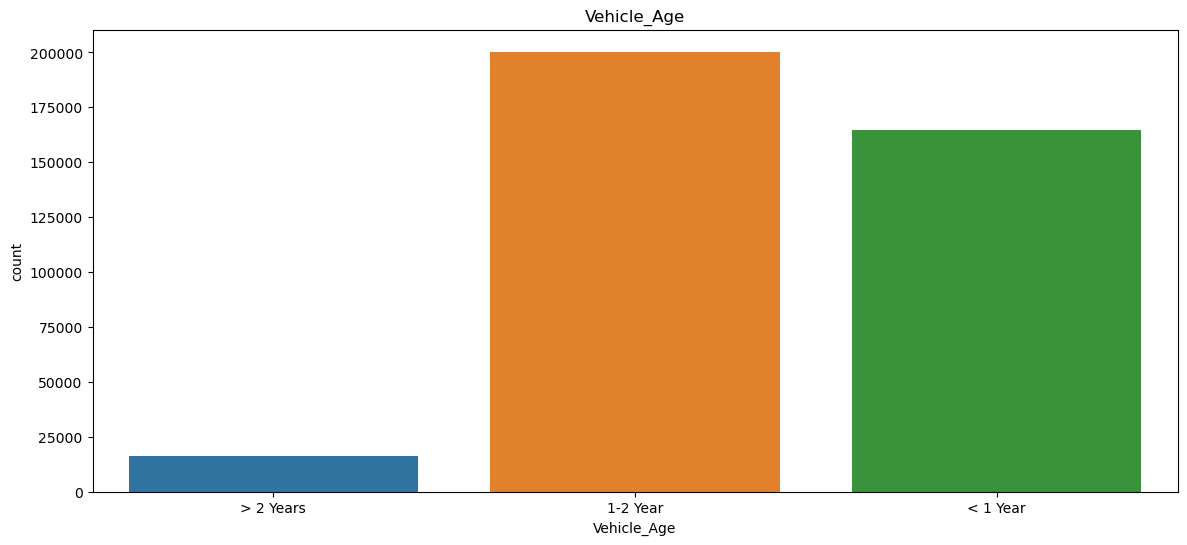

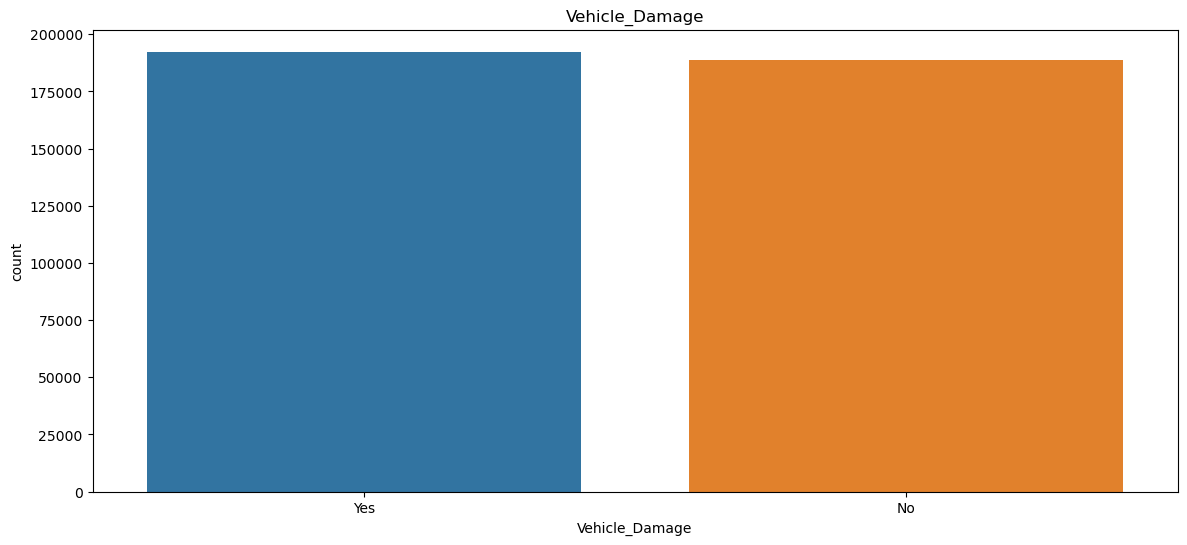

In [36]:
def categorical_plot():
    plt.figure(figsize=(14,6)) 
    plt.title('Gender')
    sns.countplot(x="Gender",data=df)
    plt.show()
    plt.figure(figsize=(14,6)) 
    plt.title('Vehicle_Age')
    sns.countplot(x="Vehicle_Age",data=df)
    plt.show()
    plt.figure(figsize=(14,6)) 
    plt.title('Vehicle_Damage')
    sns.countplot(x="Vehicle_Damage",data=df)
    plt.show()

categorical_plot()   








Min: 1
Max: 381109
Mean: 190555.0


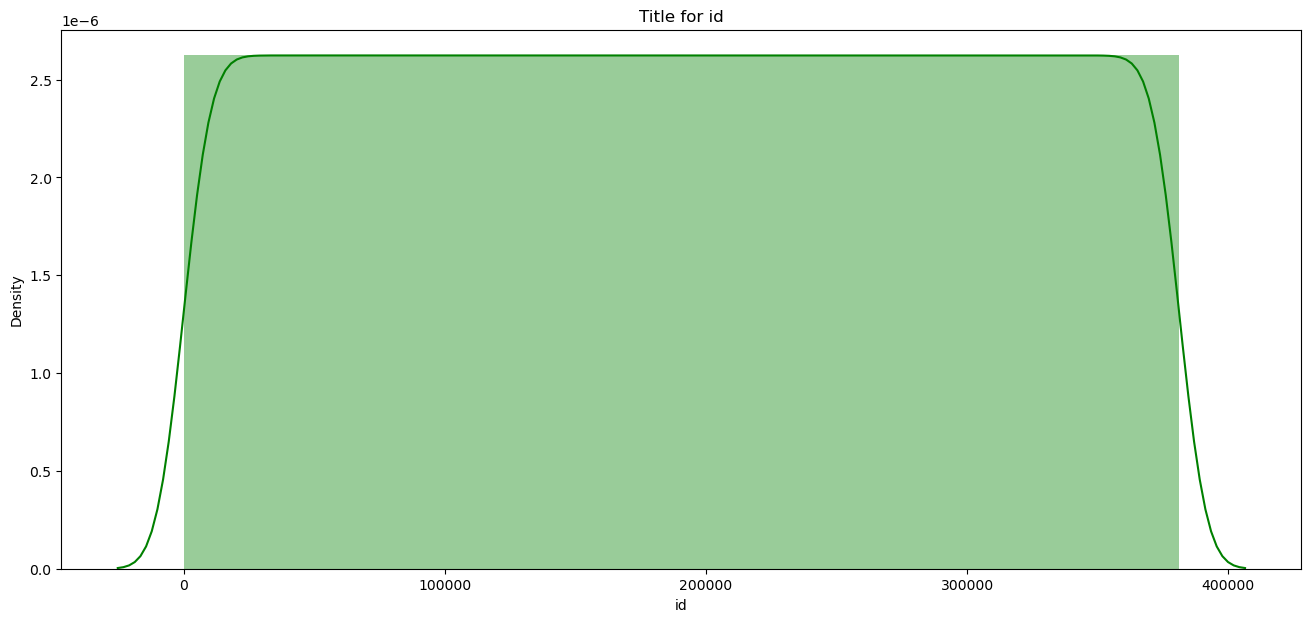

Min: 20
Max: 85
Mean: 38.822583565331705


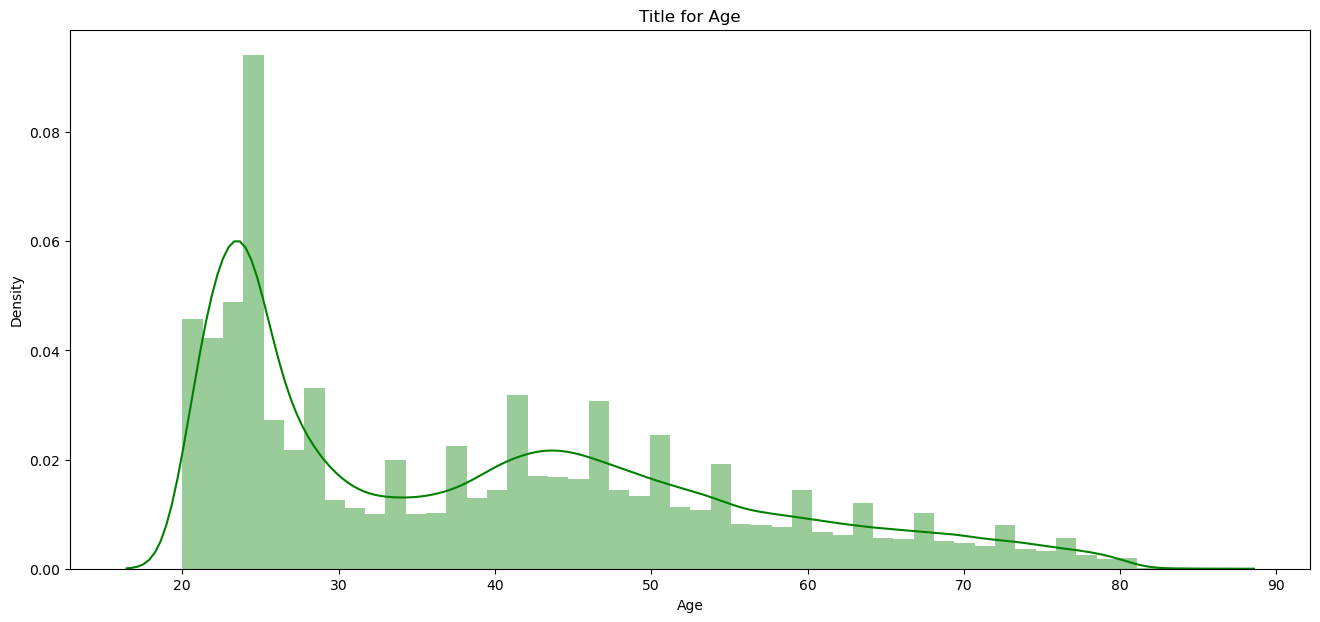

Min: 0
Max: 1
Mean: 0.9978693759528114


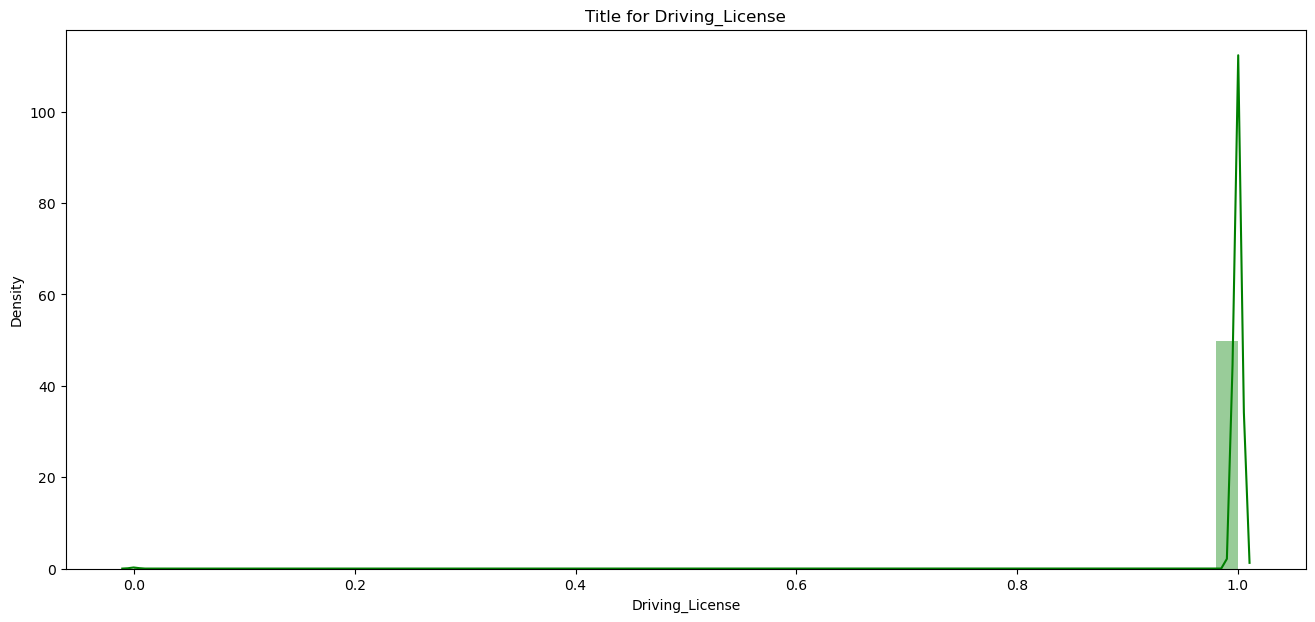

Min: 0.0
Max: 52.0
Mean: 26.388807401557035


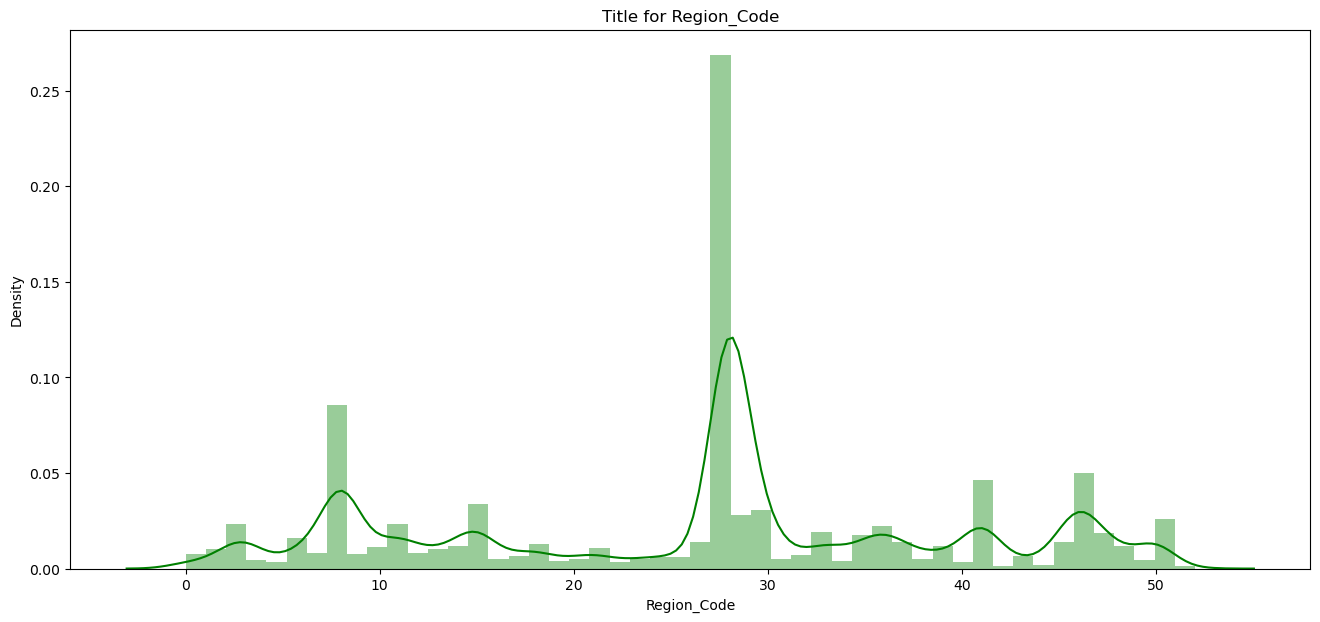

Min: 0
Max: 1
Mean: 0.4582101183650871


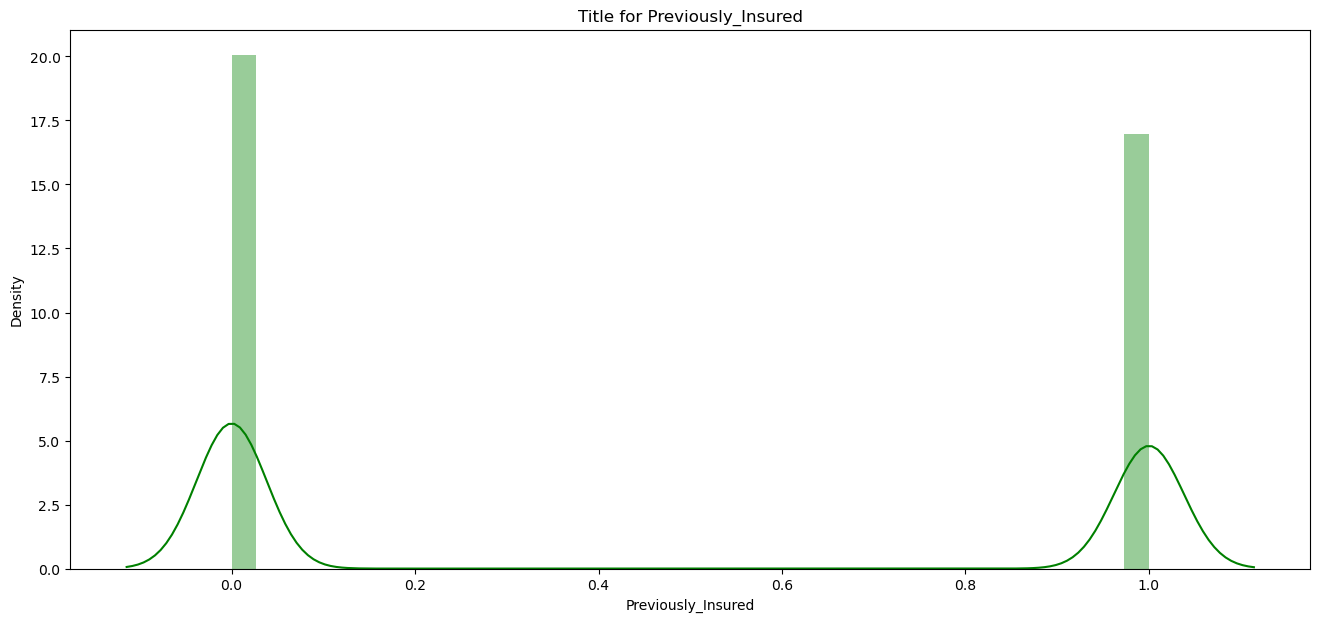

Min: 2630.0
Max: 540165.0
Mean: 30564.389581458323


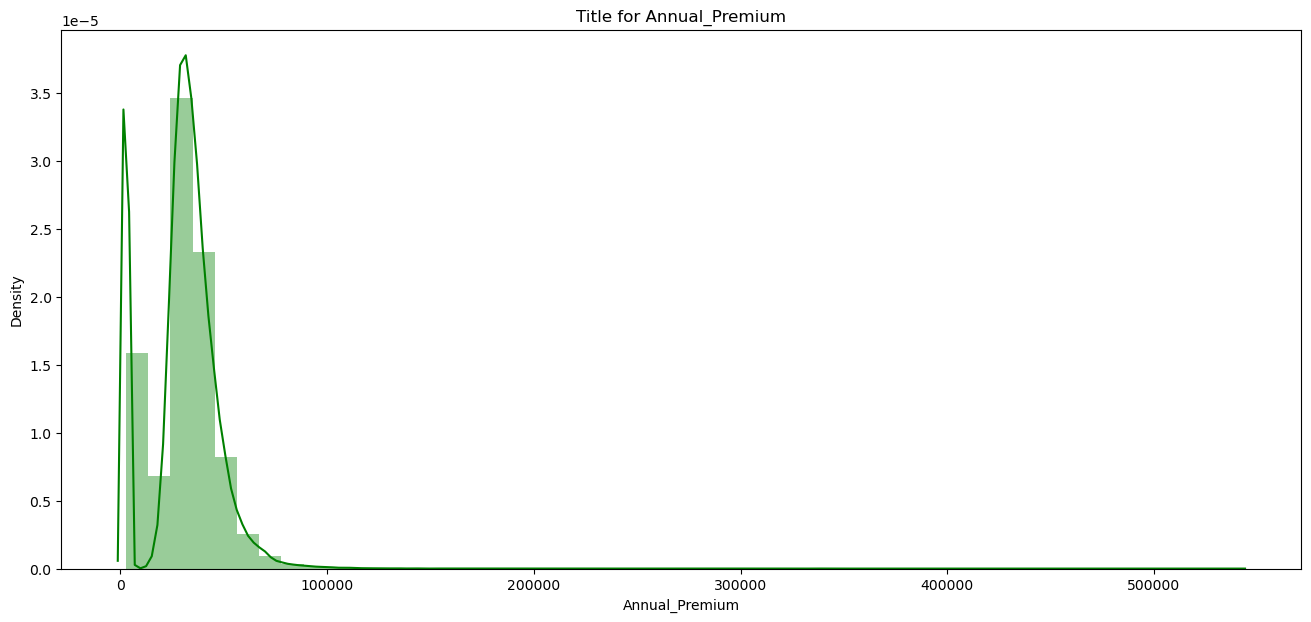

Min: 1.0
Max: 163.0
Mean: 112.03429465061177


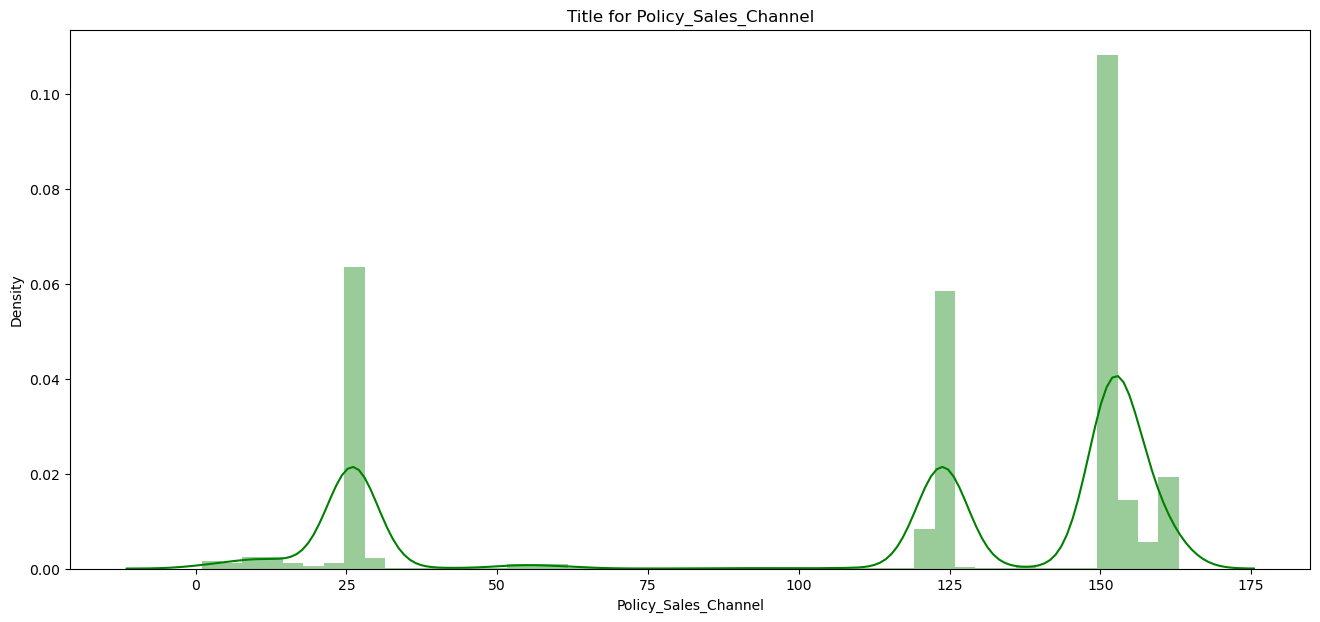

Min: 10
Max: 299
Mean: 154.34739667654136


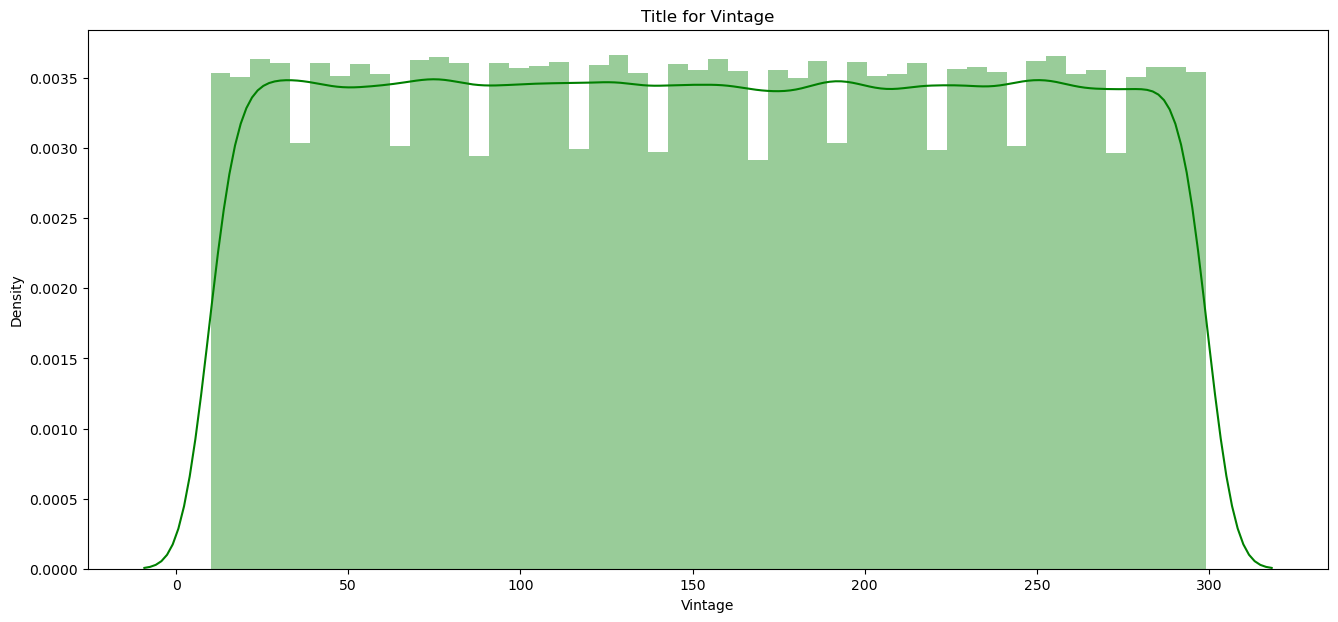

Min: 0
Max: 1
Mean: 0.12256336113815208


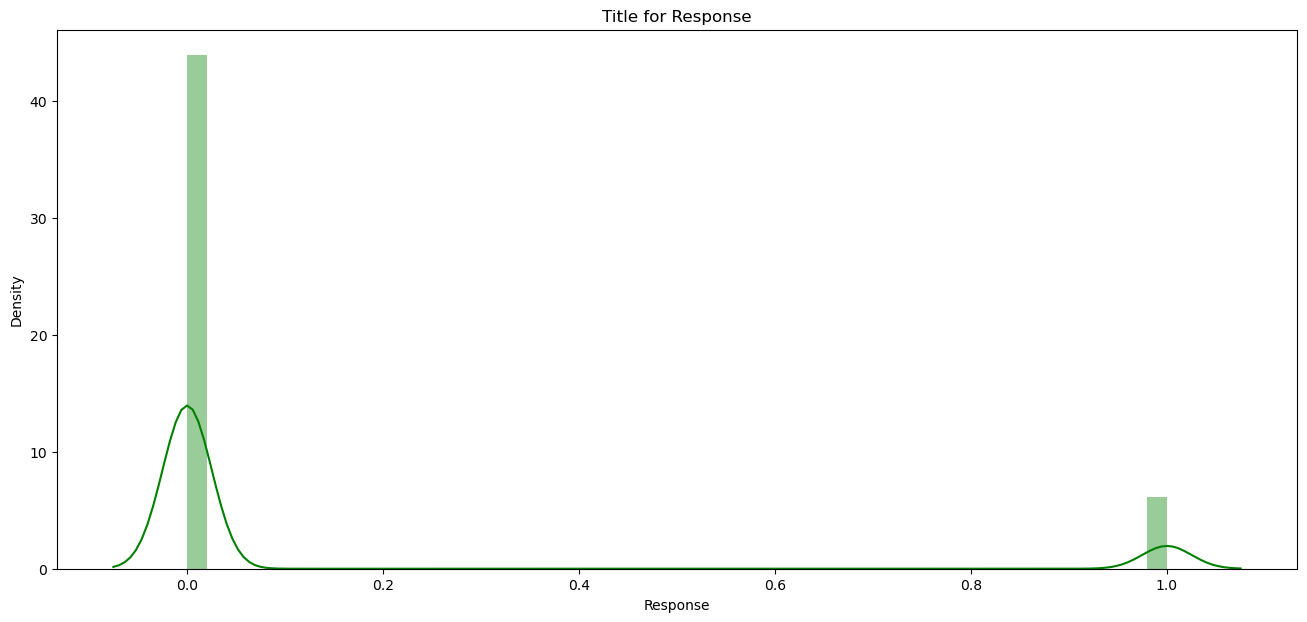

In [37]:
def numerical_plot():
    for col in df.select_dtypes (include=np.number): 
        print('Min:',df[col].min())
        print('Max:',df[col].max()) 
        print('Mean:',df[col].mean())
        plt.figure(figsize=(16,7))
        plt.title('Title for '+col)
        sns.distplot(df[col],color='g')
        plt.show()
        

numerical_plot()





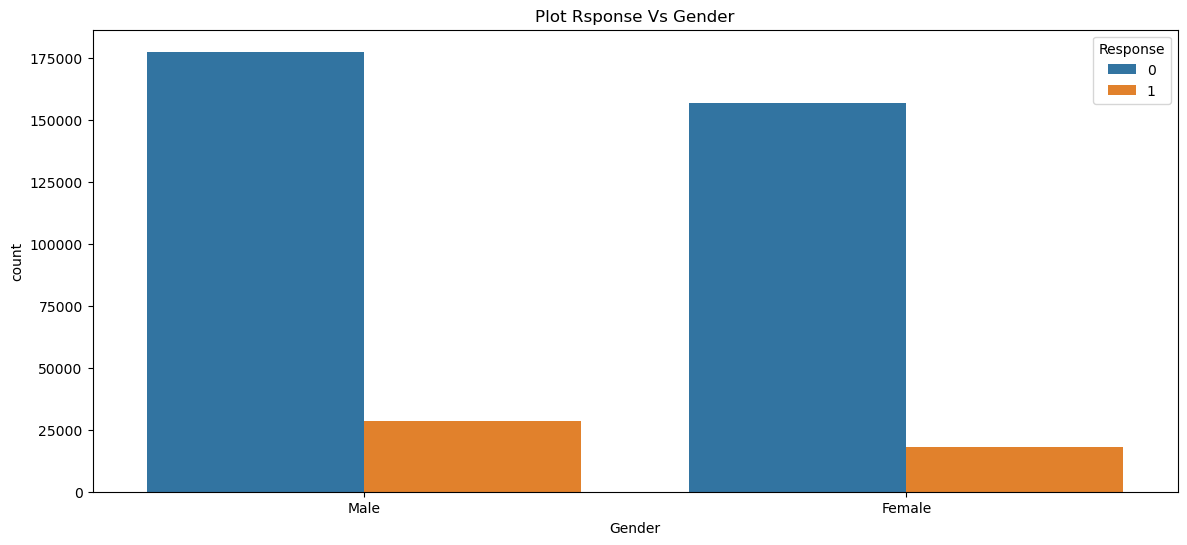

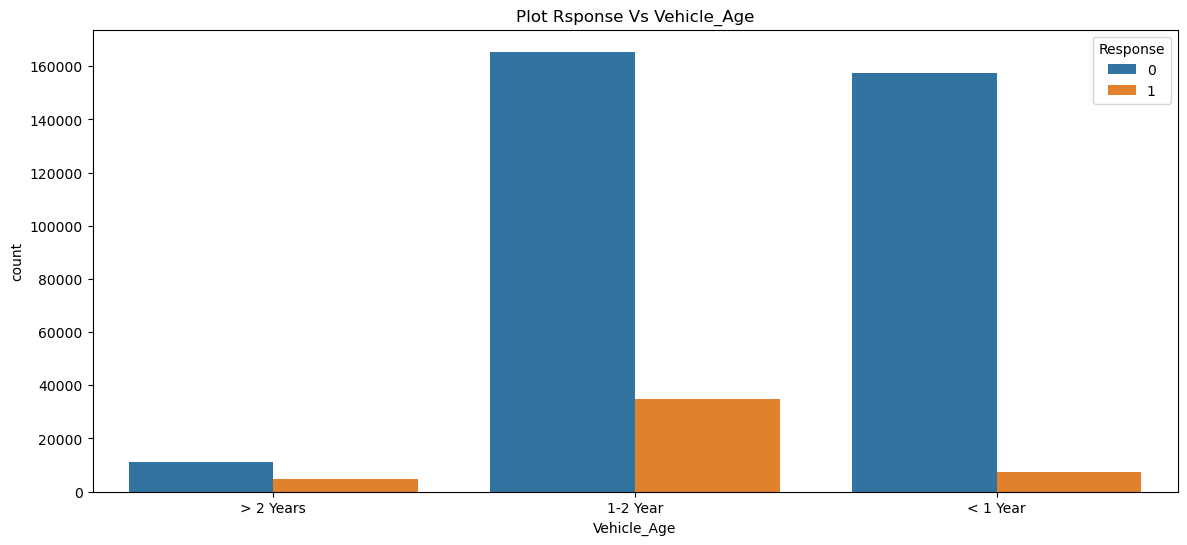

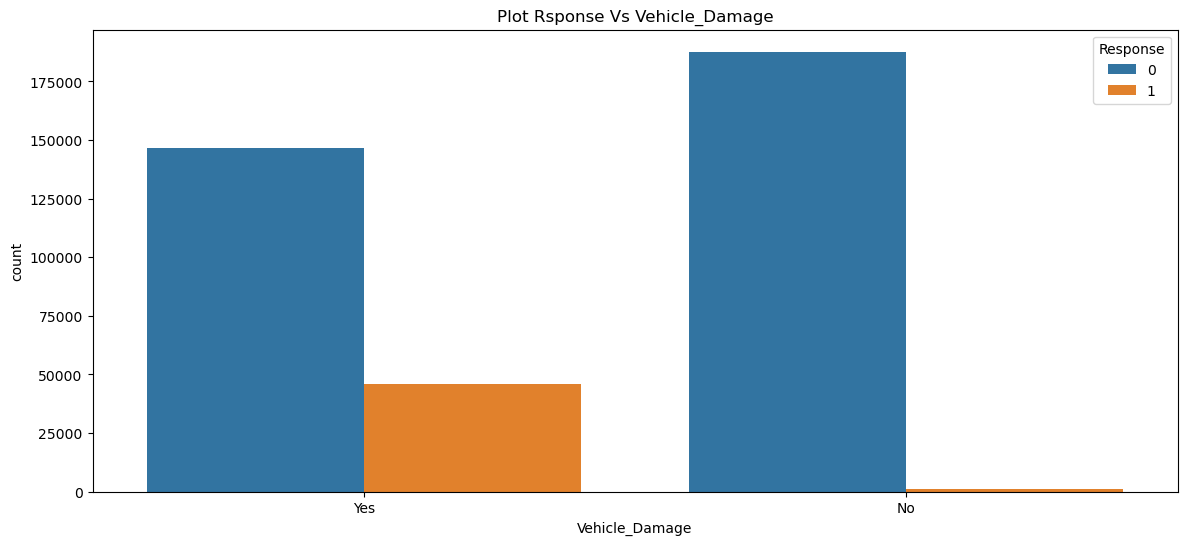

In [42]:
def cat_vs_Response():
    plt.figure(figsize=(14,6)) 
    sns.countplot(x="Gender", hue= 'Response', data=df)
    plt.title('Plot Rsponse Vs Gender')
    plt.show()
    print()
    plt.figure(figsize=(14,6)) 
    sns.countplot(x="Vehicle_Age", hue= 'Response', data=df)
    plt.title('Plot Rsponse Vs Vehicle_Age')
    plt.show()
    print()
    plt.figure(figsize=(14,6)) 
    sns.countplot(x="Vehicle_Damage", hue= 'Response', data=df)
    plt.title('Plot Rsponse Vs Vehicle_Damage')
    plt.show()
    print()

cat_vs_Response()








In [43]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
cat_df = df.select_dtypes (exclude=np.number)
cat_df.columns



Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

Transform Object into Numerical

In [59]:
lb=LabelEncoder()
lb.fit_transform(np.array(df['Vehicle_Age']).reshape(-1,1))
for i in cat_df.columns: 
    print("\n")
    df[i] = lb.fit_transform(np.array(df[i]).reshape(-1,1)) 
df.info()
print("\nvalues missing or not check")
df['Response'].value_counts()









<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB

Clean_Data


values missing or not check


0    334399
1     46710
Name: Response, dtype: int64

In [62]:
print("\nClean_Data")
df.head()



Clean_Data


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [67]:
no_df = df[df['Response']==0]
yes_df = df[df['Response']==1]

In [66]:
yes_df.shape

(46710, 12)

In [65]:
no_df.shape

(334399, 12)

Approximately 1lakh data 46710 responses are yes and remaining are no
so,(100000-46710) is equal to 53290 responses are no

In [68]:
(100000-46710)

53290

In [69]:
new_no_df = no_df.head (53290)
final = pd.concat([new_no_df,yes_df])
final.to_csv('Analyzed_Data.csv',index=False)